# Housing Price Prediction

### Installing Packages

In [1]:
import pandas as pd # Data Processing
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Visualizations
import seaborn as sns # Visualizations

%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # Ignore Warnings

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

### Exploring Datasets

In [3]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [7]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

 #### Checking Null Values

In [8]:
df_train.columns[df_train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [9]:
# Checking How Many Nans in Each Column
null_col = df_train[['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature']]
null_col.isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
null_col

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,NaN,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,NaN,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,NaN,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,NaN,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,NaN,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [11]:
# Identifying which attributes contain numerical values 
null_col.select_dtypes(include='number').columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [12]:
# Replacing NaNs in the numerical columns with the median
nan_val = df_train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']] 
for med in nan_val:
    median_val = df_train[med].median()
    df_train[med].fillna(median_val, inplace=True)
    

In [13]:
# Dropping categorical attributes that contain over 100 NaN values
df_train = df_train.drop(['LotFrontage','Alley', 'MasVnrType',
           'FireplaceQu','PoolQC', 'Fence','MiscFeature'],axis=1)

In [14]:
# Replacing NaNs in categorical attributes with the Mode
cat_col = df_train[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']]
for mode in cat_col:
    mode_val = df_train[mode].mode()[0]
    df_train[mode].fillna(mode_val, inplace=True)


In [15]:
df_train.columns[df_train.isnull().any()]

Index([], dtype='object')

 #### Checking Distribution of Target Variable

<Axes: xlabel='SalePrice', ylabel='Density'>

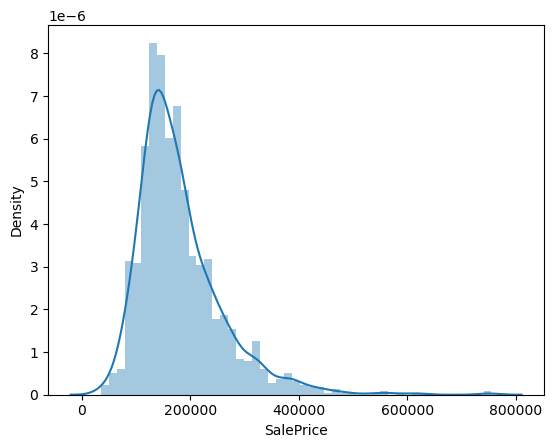

In [16]:
sns.distplot(df_train['SalePrice'])

It appears the distribution of the target variable is right skewed. <br>
This indicates the majority of data in the target is located under the mean. <br> 

#### Feature Selection

**01. Correlation Matrix**

<Axes: >

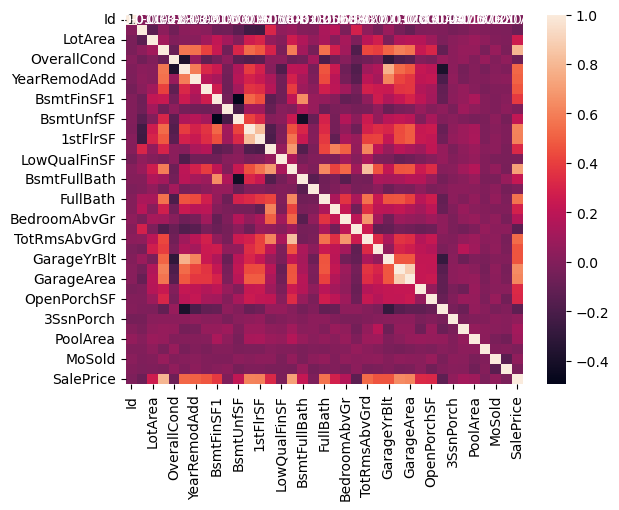

In [17]:
sns.heatmap(df_train.corr(numeric_only = True),annot=True)

**02. Univariate Testing**

In [18]:
from sklearn.feature_selection import SelectKBest, f_regression

In [19]:
# Seperating the numerical columns from the object columns in the independant variables
df_train_num = df_train.select_dtypes(exclude='object')

In [20]:
X = df_train_num.drop(['SalePrice'], axis = 1)
y = df_train['SalePrice']

In [21]:
# Feature Selector 
feat_selector = SelectKBest(f_regression,k='all')
fit = feat_selector.fit(X,y)

In [22]:
# P values and Scoring

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "f_score"]
summary_stats.sort_values(by = "p_value", inplace = True)

p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["f_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
X_new = X[selected_variables]

In [23]:
summary_stats

,input_variable,p_value,f_score
3,OverallQual,2.185675e-313,2436.770591
15,GrLivArea,4.518034e-223,1470.585010
25,GarageCars,2.498644e-169,1013.705666
26,GarageArea,5.265038e-158,926.951287
11,TotalBsmtSF,9.484229e-152,880.341282
12,1stFlrSF,5.394711e-147,845.524488
18,FullBath,1.236470e-121,668.430296
22,TotRmsAbvGrd,2.772281e-108,580.762801
5,YearBuilt,2.990229e-103,548.665821
6,YearRemodAdd,3.164948e-96,504.714855


In [24]:
selected_variables

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'Fireplaces',
 'GarageYrBlt',
 'BsmtFinSF1',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'MSSubClass',
 'OverallCond']

In [25]:
X_new

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,KitchenAbvGr,EnclosedPorch,ScreenPorch,PoolArea,MSSubClass,OverallCond
0,7,1710,2,548,856,856,2,8,2003,2003,...,8450,1,150,3,1,0,0,0,60,5
1,6,1262,2,460,1262,1262,2,6,1976,1976,...,9600,0,284,3,1,0,0,0,20,8
2,7,1786,2,608,920,920,2,6,2001,2002,...,11250,1,434,3,1,0,0,0,60,5
3,7,1717,3,642,756,961,1,7,1915,1970,...,9550,1,540,3,1,272,0,0,70,5
4,8,2198,3,836,1145,1145,2,9,2000,2000,...,14260,1,490,4,1,0,0,0,60,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999,2000,...,7917,0,953,3,1,0,0,0,60,5
1456,6,2073,2,500,1542,2073,2,7,1978,1988,...,13175,1,589,3,1,0,0,0,20,6
1457,7,2340,1,252,1152,1188,2,9,1941,2006,...,9042,0,877,4,1,0,0,0,70,9
1458,5,1078,1,240,1078,1078,1,5,1950,1996,...,9717,1,0,2,1,112,0,0,20,6


In [26]:
# Possibly use Recursive Feature Elimination with Cross validation

**03. PCA**

- 03A <br>
Determining the appropriate number of components using scree plots

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [39]:
# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Instantiate PCA object
pca = PCA()

# Fit PCA model to data
pca.fit(X_scaled)

PCA()

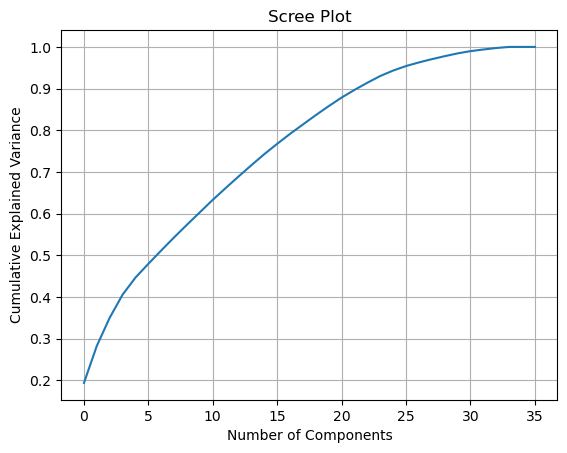

In [34]:
# Step 5: Plot the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

According to the scree plot, 24 components are optimal when observing how the line begins to level off between 20 and 25. <br>
This indicates that after 24 components, the explained variance begins to diminish with each component.

- 03B <br>
Reinstantiate the PCA object with 22 components and transform the data from the original dataset.

In [59]:
# Instantiate PCA object
num_components = 24
pca = PCA(n_components=num_components)

# Fit PCA model to data
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
X_pca

array([[ 1.5563286 ,  0.3245987 , -1.44111748, ...,  0.27788051,
         0.10586914,  0.10914747],
       [-0.1228492 , -1.07469424,  1.19463596, ..., -1.56863444,
        -0.52243439, -0.54006424],
       [ 1.71994023,  0.20465319, -1.27662724, ...,  0.6040945 ,
        -0.67752715,  0.24145057],
       ...,
       [ 0.49803043,  3.36725319,  1.78536927, ...,  0.32546021,
        -1.71225946, -1.33366715],
       [-2.87704127, -1.94940143,  2.05347891, ...,  0.36916214,
         0.99875213, -0.04467667],
       [-0.93312986, -1.45298137,  1.75986924, ..., -1.92283503,
         1.72908758,  0.92837274]])

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [62]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 3: Fit a linear regression model using PCA-transformed features
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", rmse)

Mean Squared Error: 38456.833767688106


**04. Cross-Validation**


In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
# Creating range of PCA components to try on Linear Regression model 
component_range = range(15,30) # Based on earlier Scree plot of optimal number of components

In [74]:
# Initializing lists to store cross-validation scores
cv_scores_mean = []
cv_scores_std = []

# Looping over different PCA component values
for num_components in component_range:
    # Performing PCA transformation
    pca = PCA(n_components=num_components)
    X_pca = pca.fit_transform(X)
    
    # Fitting Linear Regression model
    model = LinearRegression()

    # Cross-validation
    cv_scores = cross_val_score(model, X_pca, y, cv=10, scoring='neg_mean_squared_error')

    # Convert negative MSE to RMSE
    cv_scores = np.sqrt(-cv_scores)
    
    # Scoring mean and std of cross-validation scores
    cv_scores_mean.append(np.mean(cv_scores))
    cv_scores_std.append(np.std(cv_scores))    

In [75]:
print(cv_scores_mean)

[2070871738.7873604, 2070541326.9588883, 2075079358.821312, 2061388174.3362815, 1739672955.9975343, 1718862416.601905, 1699362283.6696353, 1703781985.8067842, 1702972934.0438058, 1608598459.0690694, 1522508253.8715904, 1338207346.041882, 1334343011.744692, 1332421080.3276613, 1332308025.0665298]


In [79]:
# Printing results
for i, num_components in enumerate(component_range):
    print("Number of Components:", num_components)
    print("Mean RMSE:", cv_scores_mean[i])
    print("Standard Deviation of RMSE:", cv_scores_std[i])
    print()

Number of Components: 15
Mean RMSE: 2070871738.7873604
Standard Deviation of RMSE: 1397921637.6750505

Number of Components: 16
Mean RMSE: 2070541326.9588883
Standard Deviation of RMSE: 1387751003.9003649

Number of Components: 17
Mean RMSE: 2075079358.821312
Standard Deviation of RMSE: 1389016216.323957

Number of Components: 18
Mean RMSE: 2061388174.3362815
Standard Deviation of RMSE: 1340351261.8136601

Number of Components: 19
Mean RMSE: 1739672955.9975343
Standard Deviation of RMSE: 1205389666.5612037

Number of Components: 20
Mean RMSE: 1718862416.601905
Standard Deviation of RMSE: 1212614842.7610984

Number of Components: 21
Mean RMSE: 1699362283.6696353
Standard Deviation of RMSE: 1189210389.9943168

Number of Components: 22
Mean RMSE: 1703781985.8067842
Standard Deviation of RMSE: 1193545387.8980312

Number of Components: 23
Mean RMSE: 1702972934.0438058
Standard Deviation of RMSE: 1191607418.65756

Number of Components: 24
Mean RMSE: 1608598459.0690694
Standard Deviation of R